In [80]:
import pandas as pd
data_raw = pd.read_html("https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651")[0]

data = data_raw.drop(['Unnamed: 0', 'rowid'], axis=1)
data[:8]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007


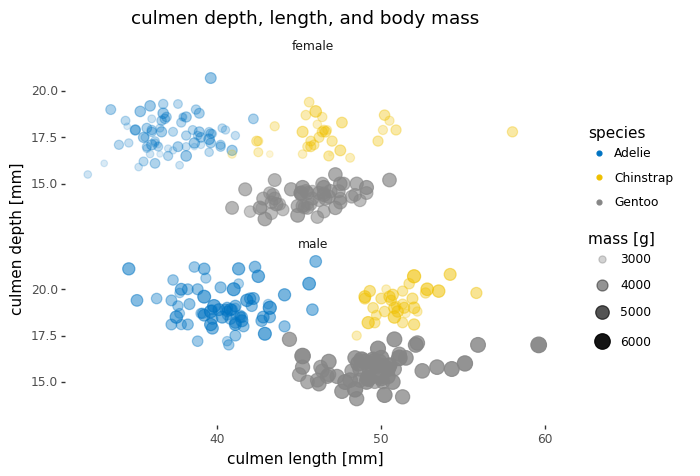

<ggplot: (8742583301544)>

In [100]:
from plotnine.scales.scale_xy import scale_y_continuous
from plotnine.scales import scale_color_manual, scale_fill_manual
from plotnine import ggplot, aes, geom_point, labs, facet_wrap
from plotnine.themes import theme_set, theme_tufte

theme_set(theme_tufte())

p = (ggplot(data[~data.sex.isna()])
    + aes(x="bill_length_mm", y="bill_depth_mm")
    + geom_point(aes(size="body_mass_g", fill="species", color="species", alpha="body_mass_g"))
    + labs(title="culmen depth, length, and body mass", x="culmen length [mm]", y="culmen depth [mm]", size="mass [g]", alpha="mass [g]")
    + scale_y_continuous(labels=lambda l: [round(a, 1) for a in l])
    + scale_fill_manual(values=["#0073c2", "#efc000", "#868686"]) #
    + scale_color_manual(values=["#0073c2", "#efc000", "#868686"])
    + facet_wrap("sex", ncol=1)
)
p

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_ydensity : Removed 2 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 2 rows containing non-finite values.


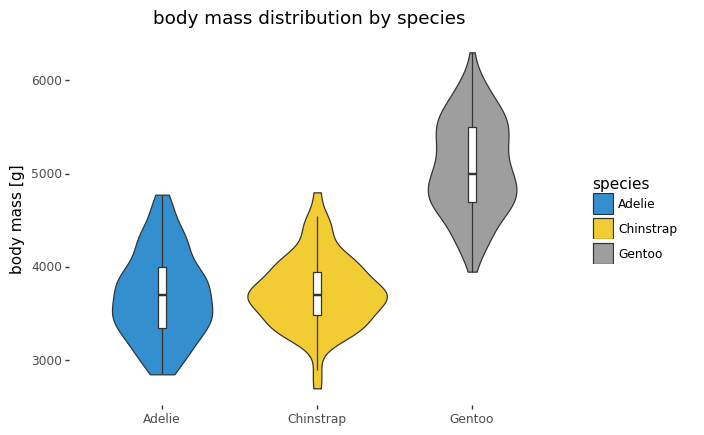

<ggplot: (8742586079254)>

In [101]:
from plotnine import ggplot, aes, geom_violin, geom_boxplot, labs
from plotnine.scales import scale_fill_manual

p = (ggplot(data)
    + aes(x="species", y="body_mass_g", fill="species")
    + geom_violin(alpha=0.8)
    + geom_boxplot(width=0.05, outlier_shape="", fill="#fff")
    + scale_fill_manual(values=["#0073c2", "#efc000", "#868686"])
    + labs(title="body mass distribution by species", x="", y="body mass [g]")
)
p